## Data Science - Group 15

### Topic: Toronto E-Bike demographic, travel and public opinion data

In [1]:
##### Data Ingestion

import pandas as pd

raw_data_path = "../data/E-Bike_Survey_Responses.csv"
columnNames = names=['TimeStamp','AgeRange','Sex','PhysicalHealth','Education','HouseholdIncome','EmploymentStatus','District','AvgDistanceTravel','AvgCommute','PreferedTransportation','PrivateMotorizedVehicles','SupportingStatements','MultiUseTrails','AwarePathSpeedLimit','WitnessedCollisionConflict','OpinionSpeedLimit','OpinionPathBylaw','BicycleLaneUsage','OpinionLaneBylaw','OpinionSidewalk','OpinionPersonalMobilityDevice'] # names of columns

survey = pd.read_csv(raw_data_path, names=columnNames, skiprows=1)

survey.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 22 columns):
TimeStamp                        2238 non-null object
AgeRange                         2234 non-null object
Sex                              2221 non-null object
PhysicalHealth                   2227 non-null object
Education                        2220 non-null object
HouseholdIncome                  2178 non-null object
EmploymentStatus                 2223 non-null object
District                         2237 non-null object
AvgDistanceTravel                2237 non-null object
AvgCommute                       2237 non-null object
PreferedTransportation           2238 non-null object
PrivateMotorizedVehicles         2238 non-null object
SupportingStatements             2238 non-null object
MultiUseTrails                   2238 non-null object
AwarePathSpeedLimit              2238 non-null object
WitnessedCollisionConflict       2238 non-null object
OpinionSpeedLimit            

In [2]:
survey = survey.dropna()
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 0 to 2237
Data columns (total 22 columns):
TimeStamp                        2138 non-null object
AgeRange                         2138 non-null object
Sex                              2138 non-null object
PhysicalHealth                   2138 non-null object
Education                        2138 non-null object
HouseholdIncome                  2138 non-null object
EmploymentStatus                 2138 non-null object
District                         2138 non-null object
AvgDistanceTravel                2138 non-null object
AvgCommute                       2138 non-null object
PreferedTransportation           2138 non-null object
PrivateMotorizedVehicles         2138 non-null object
SupportingStatements             2138 non-null object
MultiUseTrails                   2138 non-null object
AwarePathSpeedLimit              2138 non-null object
WitnessedCollisionConflict       2138 non-null object
OpinionSpeedLimit            

In [3]:
#Drop TimeStamp Column, it does not provide any useful information
survey = survey.drop('TimeStamp', axis = 1)

In [4]:
#print(survey['Sex'].value_counts()) #Light Cleaning needed - some non-standard/open ended replies 
#print(survey['AgeRange'].value_counts()) # Is Clean
#print(survey['PhysicalHealth'].value_counts()) #Light Cleaning needed - some non-standard/open ended replies 
#print(survey['Education'].value_counts()) #Light Cleaning needed - some non-standard/open ended replies
#print(survey['HouseholdIncome'].value_counts()) #Is Clean
#print(survey['EmploymentStatus'].value_counts()) #Light Cleaning needed - some non-standard/open ended replies 
#print(survey['District'].value_counts()) #Heavy cleaning needed - alot of non-standard/open ended replies
#print(survey['AvgDistanceTravel'].value_counts())#Is Clean
#print(survey['AvgCommute'].value_counts())#Is Clean
#print(survey['PreferedTransportation'].value_counts())#Light Cleaning needed - some non-standard/open ended responces 
#print(survey['PrivateMotorizedVehicles'].value_counts())#Heavy cleaning needed - alot of non-standard/open ended responces
#print(survey['SupportingStatements'].value_counts()) #Moderate Cleaning needed - various combinations of responces, all appear to be bound
#print(survey['MultiUseTrails'].value_counts()) #Moderate Cleaning needed - various combinations of responces, all appear to be bound
#print(survey['AwarePathSpeedLimit'].value_counts())# Is Clean
#print(survey['WitnessedCollisionConflict'].value_counts())#Moderate Cleaning needed - various combinations of responces, all appear to be bound
#print(survey['OpinionSpeedLimit'].value_counts())#Heavy Cleaning needed - various combinations of responces and openeded responces
#print(survey['OpinionPathBylaw'].value_counts())  #Moderate Cleaning needed - various combinations of responces and openeded responces        
#print(survey['BicycleLaneUsage'].value_counts()) #Moderate Cleaning needed - various combinations of responces and openeded responces       
#print(survey['OpinionLaneBylaw'].value_counts()) #Heavy Cleaning needed - various combinations of responces and openeded responces
#print(survey['OpinionSidewalk'].value_counts()) #Moderate Cleaning needed - various combinations of responces and openeded responces           
#print(survey['OpinionPersonalMobilityDevice'].value_counts()) #Moderate Cleaning needed - various combinations of responces and openeded responces                     
               

#As I see it our options (or combination of options) to clean non-standard/open ended responces:
# 1) Drop rows
# 2) Group non-standard/open ended responces it's own category
# 3) Try to fit non-standard/open ended responces into existing categories

#my intial thought it #2 for majority features

#For the data that has various combinations, i.e. those that appear as if they were picked from a picker list, we need to identify all the unique options and: 
#1) do some sort of multi-index
#2) create new Categorical columns - Yes and No for each unique option

#my intial thought it #2 for majority of the feature



In [5]:
#Useful Functions
import re

#Function that retruns unique list from a given list
def unique_list(lst):
    unique_list = []
    for x in lst:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

#Function that splits a string 'splitString' by regexes 'splitOn'
def split_by(splitString, splitOn):
    num = [m.start() for m in re.finditer(splitOn, splitString)]
    start = 0
    SubStrs = []
    for i in num:
        SubStrs.append(splitString[start : i])
        start = i+2
    SubStrs.append(splitString[start : ])
    return SubStrs

#Function that appends unique values by regexes 'splitOn' from string'newString' into a current list 'currentList' of values 
def unique_list_append(currentList, newString, splitOn):
    for x in split_by(newString, splitOn):
        if x not in currentList:
            currentList.append(x)
    return currentList

#Function that returns a list of unique values from column 'feature' in Dataframe 'df'
def unique_feature_list(df, feature, splitOn):
    unique_feature_list = []
    for item, row in df.iterrows():
        unique_list_append(unique_feature_list,row[feature], splitOn)
    return unique_feature_list
        
#Function that retruns datafame with all values other then 'keepValues' in 'feature' replaced with 'replaceWith' in Dataframe 'df'
def Replace_All_Other_Values(df, feature,keepValues,replaceWith):
    for item in df[feature]:
        if item in keepValues:
            pass
        else:
            df = df.replace({feature: item},replaceWith)
    return df

#Function creates a new column 'value'; if 'value' exists in Dataframe 'df' column 'oldFeature' in value for row set to 'Yes'
def new_feature_from_value(df, value, oldFeature):
    df[oldFeature+"_"+value] = 0
    for item, row in df.iterrows():
        if value.lower() in row[oldFeature].lower():
            df.loc[[item],[oldFeature+"_"+value]] = 1
    return df
    
    


    

In [6]:
#Clean Sex feature
survey = Replace_All_Other_Values(survey, 'Sex',['Male','Female'], 'Other')
#survey['Sex'].value_counts()

#Clean PhysicalHealth feature
survey = Replace_All_Other_Values(survey, 'PhysicalHealth',['Good','Excellent','Very good','Fairly good','Poor'], 'Other')
#survey['PhysicalHealth'].value_counts()

#Clean Education feature
survey = Replace_All_Other_Values(survey, 'Education',['University degree','Post graduate','College or trade school diploma','High school diploma '], 'Other')
#survey['Education'].value_counts()

#Clean EmploymentStatus feature
survey = Replace_All_Other_Values(survey, 'EmploymentStatus',['Full Time','Self Employed','Retired','Part Time','Student','Unemployed','Home Maker'], 'Other')
#survey['EmploymentStatus'].value_counts()            

#Clean District feature
survey = Replace_All_Other_Values(survey, 'District',['Central Toronto, York or East York','Etobicoke','North York','Scarborough','Mississauga','Brampton'], 'Other')
#survey['District'].value_counts()  

#Clean PreferedTransportation feature
survey = Replace_All_Other_Values(survey, 'PreferedTransportation',['bicycle','Etobicoke','private motor vehicle (car, truck, SUV, van, motorcycle, gas limited speed motorcycle or moped)','transit','walking','scooter type e-bike','pedal assist type e-bike'], 'Other')
#survey['PreferedTransportation'].value_counts()

#Create new categorical features to replace PrivateMotorizedVehicles feature
survey['PrivateMotorizedVehicles_HasCarSUVTruckOrVan'] = 0
survey['PrivateMotorizedVehicles_HasMotorcycle'] = 0
survey['PrivateMotorizedVehicles_HasBicycle'] = 0
survey['PrivateMotorizedVehicles_HasPAEbike'] = 0
survey['PrivateMotorizedVehicles_HasScooterEbike'] = 0
survey['PrivateMotorizedVehicles_HasGasEbike'] = 0
survey['PrivateMotorizedVehicles_HasAutoShare'] = 0

for item, row in survey.iterrows():
        if "car" in row['PrivateMotorizedVehicles'].lower() or "suv" in row['PrivateMotorizedVehicles'].lower() or "truck" in row['PrivateMotorizedVehicles'].lower() or "van" in row['PrivateMotorizedVehicles'].lower():
            survey.loc[[item],['PrivateMotorizedVehicles_HasCarSUVTruckOrVan']] = 1
        if "motorcycle" in row['PrivateMotorizedVehicles'].lower():
            survey.loc[[item],['PrivateMotorizedVehicles_HasMotorcycle']] = 1
        if "bicycle" in row['PrivateMotorizedVehicles'].lower():
            survey.loc[[item],['PrivateMotorizedVehicles_HasBicycle']] = 1
        if "bike" in row['PrivateMotorizedVehicles'].lower() and ("pedal" in row['PrivateMotorizedVehicles'].lower() or "assist" in row['PrivateMotorizedVehicles'].lower()):
            survey.loc[[item],['PrivateMotorizedVehicles_HasPAEbike']] = 1
        if ("bike" in row['PrivateMotorizedVehicles'].lower() and "scooter" in row['PrivateMotorizedVehicles'].lower()): 
            survey.loc[[item],['PrivateMotorizedVehicles_HasScooterEbike']] = 1             
        if ("scooter" in row['PrivateMotorizedVehicles'].lower() and not "bike" in row['PrivateMotorizedVehicles'].lower()) or "moped" in row['PrivateMotorizedVehicles'].lower() or "vespa" in row['PrivateMotorizedVehicles'].lower():
            survey.loc[[item],['PrivateMotorizedVehicles_HasGasEbike']] = 1  
        if "share" in row['PrivateMotorizedVehicles'].lower() or "zip" in row['PrivateMotorizedVehicles'].lower() or "rental" in row['PrivateMotorizedVehicles'].lower():
            survey.loc[[item],['PrivateMotorizedVehicles_HasAutoShare']] = 1
          
#survey[['PrivateMotorizedVehicles','PrivateMotorizedVehicles_HasCarSUVTruckOrVan','PrivateMotorizedVehicles_HasMotorcycle','PrivateMotorizedVehicles_HasBicycle','PrivateMotorizedVehicles_HasPAEbike','PrivateMotorizedVehicles_HasScooterEbike','PrivateMotorizedVehicles_HasGasEbike','PrivateMotorizedVehicles_HasAutoShare']]


#Create new categorical features to replace MultiUseTrails feature
survey = new_feature_from_value(survey,'cycle','MultiUseTrails')
survey = new_feature_from_value(survey,'walk','MultiUseTrails')
survey = new_feature_from_value(survey,'rarely use','MultiUseTrails')
survey = new_feature_from_value(survey,'pedal assist type e-bike','MultiUseTrails')
survey = new_feature_from_value(survey,'stroller, young child, or pet','MultiUseTrails')
survey = new_feature_from_value(survey,'run','MultiUseTrails')
survey = new_feature_from_value(survey,'motor propelled e-bike','MultiUseTrails')

#survey[['MultiUseTrails','MultiUseTrails_cycle','MultiUseTrails_walk','MultiUseTrails_rarely use','MultiUseTrails_pedal assist type e-bike','MultiUseTrails_stroller child or pet','MultiUseTrails_run','MultiUseTrails_motor propelled e-bike']]


#Create new categorical features to replace OpinionPathBylaw feature
for i in unique_feature_list(survey,'SupportingStatements', ', [A-Z]'):
    survey = new_feature_from_value(survey, i ,'SupportingStatements')

#showMe =['SupportingStatements']
#for i in unique_feature_list(survey,'SupportingStatements', ', [A-Z]'):
#    showMe.append("SupportingStatements_"+i) 
#survey[showMe]


#Create new categorical features to replace OpinionPathBylaw feature
for i in unique_feature_list(survey,'OpinionPathBylaw', ', [^including^but]'):
    survey = new_feature_from_value(survey, i ,'OpinionPathBylaw')

#showMe =['OpinionPathBylaw']
#for i in unique_feature_list(survey,'OpinionPathBylaw', ', [^including^but]'):
#    showMe.append("OpinionPathBylaw_"+i) 
#survey[showMe]


#Create new categorical features to replace OpinionSidewalk feature
survey = new_feature_from_value(survey,'maintain the existing programs for signage','OpinionSidewalk')
survey = new_feature_from_value(survey,'education and enforcement','OpinionSidewalk')
survey = new_feature_from_value(survey,'increase signage','OpinionSidewalk')
survey = new_feature_from_value(survey,'increase education','OpinionSidewalk')
survey = new_feature_from_value(survey,'increase enforcement','OpinionSidewalk')
survey = new_feature_from_value(survey,'education and enforcement','OpinionSidewalk')

#survey[['OpinionSidewalk','OpinionSidewalk_maintain the existing programs for signage','OpinionSidewalk_education and enforcement','OpinionSidewalk_increase signage','OpinionSidewalk_increase education','OpinionSidewalk_increase enforcement','OpinionSidewalk_education and enforcement']]


#Create new categorical features to replace OpinionPersonalMobilityDevice feature
survey = new_feature_from_value(survey,'Update the definition of a personal mobility device, so that they must travel at speeds close to walking speed','OpinionPersonalMobilityDevice')
survey = new_feature_from_value(survey,'Institute a speed limit for sidewalks','OpinionPersonalMobilityDevice')
survey = new_feature_from_value(survey,'Do nothing','OpinionPersonalMobilityDevice')
survey = new_feature_from_value(survey,'Don\'t Know / Rather Not Answer','OpinionPersonalMobilityDevice')

#survey[['OpinionPersonalMobilityDevice','OpinionPersonalMobilityDevice_Update the definition of a personal mobility device, so that they must travel at speeds close to walking speed','OpinionPersonalMobilityDevice_Institute a speed limit for sidewalks','OpinionPersonalMobilityDevice_Do nothing','OpinionPersonalMobilityDevice_Don\'t Know / Rather Not Answer']]



#Create new categorical features to replace OpinionLaneBylaw feature
survey = new_feature_from_value(survey,'The bylaw should be modified to allow e-bikes to drive in bicycle lanes, using their motors and not pedalling, without any restrictions set in place by the City. (eg. width, weight, speed)','OpinionLaneBylaw')
survey = new_feature_from_value(survey,'The bylaw should be modified to allow e-bikes to use bicycle lanes in suburban areas, but not in busy downtown bicycle lanes','OpinionLaneBylaw')
survey = new_feature_from_value(survey,'No changes are necessary to the existing bylaw','OpinionLaneBylaw')
survey = new_feature_from_value(survey,'Motorized vehicles should generally not be allowed in bicycle lanes, but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone','OpinionLaneBylaw')
survey = new_feature_from_value(survey,'The bylaw should be modified to allow \'pedal assist\' type e-bikes to pedal, but get a battery boost','OpinionLaneBylaw')
survey = new_feature_from_value(survey,'The bylaw should be modified to allow all kinds of e-bikes to drive in bicycle lanes without pedalling, but there should be some restrictions (eg. width, weight, speed)','OpinionLaneBylaw')


#survey[['OpinionLaneBylaw','OpinionLaneBylaw_The bylaw should be modified to allow e-bikes to drive in bicycle lanes, using their motors and not pedalling, without any restrictions set in place by the City. (eg. width, weight, speed)','OpinionLaneBylaw_The bylaw should be modified to allow e-bikes to use bicycle lanes in suburban areas, but not in busy downtown bicycle lanes','OpinionLaneBylaw_No changes are necessary to the existing bylaw','OpinionLaneBylaw_Motorized vehicles should generally not be allowed in bicycle lanes, but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone','OpinionLaneBylaw_The bylaw should be modified to allow \'pedal assist\' type e-bikes to pedal, but get a battery boost','OpinionLaneBylaw_The bylaw should be modified to allow all kinds of e-bikes to drive in bicycle lanes without pedalling, but there should be some restrictions (eg. width, weight, speed)']]


#Create new categorical features to replace BicycleLaneUsage feature
survey = new_feature_from_value(survey,'ride a commuter, or cruiser style bicycle','BicycleLaneUsage')
survey = new_feature_from_value(survey,'ride a road bicycle, or a fixie','BicycleLaneUsage')
survey = new_feature_from_value(survey,'ride a mountain, downhill, or BMX bicycle','BicycleLaneUsage')
survey = new_feature_from_value(survey,'I do not use bicycle lanes','BicycleLaneUsage')
survey = new_feature_from_value(survey,'pedal a pedal assist type e-bike','BicycleLaneUsage')
survey = new_feature_from_value(survey,'drive a scooter type e-bike propelled by an electric motor','BicycleLaneUsage')
survey = new_feature_from_value(survey,'ride a folding, or recumbent','BicycleLaneUsage')

#survey[['BicycleLaneUsage','BicycleLaneUsage_ride a commuter, or cruiser style bicycle' , 'BicycleLaneUsage_ride a road bicycle, or a fixie' , 'BicycleLaneUsage_ride a mountain, downhill, or BMX bicycle' , 'BicycleLaneUsage_I do not use bicycle lanes' ,'BicycleLaneUsage_pedal a pedal assist type e-bike' ,'BicycleLaneUsage_drive a scooter type e-bike propelled by an electric motor', 'BicycleLaneUsage_ride a folding, or recumbent']]

#Create new categorical features to replace OpinionSpeedLimit feature
survey = new_feature_from_value(survey,'the trails are fine as they are','OpinionSpeedLimit')
survey = new_feature_from_value(survey,'more signage','OpinionSpeedLimit')
survey = new_feature_from_value(survey,'more enforcement (ticketing)','OpinionSpeedLimit')
survey = new_feature_from_value(survey,'more educational programs','OpinionSpeedLimit')

#survey[['OpinionSpeedLimit','OpinionSpeedLimit_the trails are fine as they are' , 'OpinionSpeedLimit_more signage' , 'OpinionSpeedLimit_more enforcement (ticketing)', 'OpinionSpeedLimit_more educational programs']]

#Create new categorical features to replace WitnessedCollisionConflict feature
survey = new_feature_from_value(survey,'I am not aware of any conflicts on the trails','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict between cyclists and pedestrians','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict between an e-biker and a pedestrian','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict between e-biker and a cyclist','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict relating to a dog(s)','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'pedestrians and/or runners','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict relating to an in-line skater','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict between two cyclists','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict between an e-biker and a pedestrian','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict between two e-bikers','WitnessedCollisionConflict')


#survey[['WitnessedCollisionConflict','WitnessedCollisionConflict_I am not aware of any conflicts on the trails','WitnessedCollisionConflict_conflict between cyclists and pedestrians','WitnessedCollisionConflict_conflict between an e-biker and a pedestrian','WitnessedCollisionConflict_conflict between e-biker and a cyclist','WitnessedCollisionConflict_conflict relating to a dog(s)','WitnessedCollisionConflict_pedestrians and/or runners','WitnessedCollisionConflict_conflict relating to an in-line skater','WitnessedCollisionConflict_conflict between two cyclists','WitnessedCollisionConflict_conflict between an e-biker and a pedestrian','WitnessedCollisionConflict_conflict between two e-bikers']]


In [7]:
## Rename columns
survey = survey.rename(columns={
'PrivateMotorizedVehicles_HasCarSUVTruckOrVan' : 'has_car',
'PrivateMotorizedVehicles_HasMotorcycle' : 'has_motorcycle',
'PrivateMotorizedVehicles_HasBicycle' : 'has_bicycle',
'PrivateMotorizedVehicles_HasPAEbike' : 'has_PAE_bike',
'PrivateMotorizedVehicles_HasScooterEbike' : 'has_scooter',
'PrivateMotorizedVehicles_HasGasEbike' : 'has_Gas_e-bike',
'PrivateMotorizedVehicles_HasAutoShare' : 'has_Auto_Share',
'MultiUseTrails_cycle' : 'trails_cycle',
'MultiUseTrails_walk' : 'trails_walk',
'MultiUseTrails_rarely use' : 'trails_rarely_use',
'MultiUseTrails_pedal assist type e-bike' : 'trails_pedal_e-bike',
'MultiUseTrails_stroller, young child, or pet' : 'trails_child_pet',
'MultiUseTrails_run' : 'trails_run',
'MultiUseTrails_motor propelled e-bike' : 'trails_motor_e-bike',
'SupportingStatements_On scooter type e-bikes, the pedals are unnecessary, and should not be required' : 'e-bike_pedals_unnecessary',
'SupportingStatements_Most scooter type e-bikes are wider than a bicycle' : 'e-bike_wider_than_bike',
'SupportingStatements_Most scooter type e-bikes weigh more than an average bicycle' : 'e-bike_heavier_than_bike',
'SupportingStatements_Most e-bikes are able to accelerate more quickly than an average cyclist, of average fitness' : 'e-bike_accelerate_faster',
'SupportingStatements_E-bikes are a green transportation option which should be encouraged' : 'e-bike_should_be_encouraged',
'SupportingStatements_E-bikes should be allowed to carry a passenger' : 'allow_e-bikes_to_have_passenger',
'SupportingStatements_Most e-bikes are able to travel further distances than an average cyclist, of average fitness.' : 'e-bike_travels_further',
'SupportingStatements_Most e-bikes are able to sustain higher average speeds than an average cyclist, of average fitness' : 'e-bike_faster_than_average_cyclist',
'SupportingStatements_E-bikes should require a license' : 'require_e-bike_license',
'SupportingStatements_E-bikes should be required to have insurance' : 'require_e-bike_insurance',
'SupportingStatements_scooter style e-bikes are different than "pedal assisted bicycle" type e-bikes and should not be considered as one vehicle category' : 'e-bike_different_than_pedal_assisted_bicycle',
'SupportingStatements_I do not agree with any of these statements' : 'Not_agree_above',
'SupportingStatements_Most scooter type e-bikes are wider than an average cyclist on their bicycle' : 'e-bike_wider_than_cyclist_on_bike',
'SupportingStatements_Most scooter type e-bikes and their drivers weigh more than an average cyclist and their bicycle' : 'e-bike_heavier_than_cyclist_on_bike',
'SupportingStatements_E-bikes should be allowed to drive more quickly than 32 km/h when on City Streets, to keep up with other cars, trucks, and other faster motor vehicles' : 'allow_e-bikes_faster_than_32km/h',
'OpinionPathBylaw_The bylaw should be modified to allow any kind of e-bike, including scooter type e-bikes use the trail' : 'allow_e-bikes_on_trail',
'OpinionPathBylaw_No changes are necessary to the existing bylaw' : 'no_bylaw_changes',
'OpinionPathBylaw_Motorized vehicles should generally not be allowed on the trail' : 'not_allow_motor_e-bikes_on_trail',
'OpinionPathBylaw_but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone' : 'allow_special_e-bikes_on_trail',
'OpinionPathBylaw_The bylaw should be modified to allow the \'pedal assist bicycle\' type of e-bikes ' : 'allow_pedal_e-bikes_on_trail',
'OpinionPathBylaw_The bylaw should be rescinded so that any kind of recreational motor vehicle can drive on the trail' : 'allow_recreational_motor_vehicles_on_trail',
'OpinionPathBylaw_The bylaw should be modified to allow e-bikes which can be pedaled and look like bicycles to use power assist up to 32 km/h' : 'e-bike_speed_limit_32km/h',
'OpinionSidewalk_maintain the existing programs for signage' : 'maintain_existing_signage',
'OpinionSidewalk_education and enforcement' : 'education_enforcement',
'OpinionSidewalk_increase signage' : 'increase_signage',
'OpinionSidewalk_increase education' : 'increase_education',
'OpinionSidewalk_increase enforcement' : 'increase_enforcement',
'OpinionPersonalMobilityDevice_Update the definition of a personal mobility device, so that they must travel at speeds close to walking speed' : 'update_personal_mobility_device_definition',
'OpinionPersonalMobilityDevice_Institute a speed limit for sidewalks' : 'set_sidewalk_speed_limit',
'OpinionPersonalMobilityDevice_Do nothing' : 'do_nothing',
'OpinionPersonalMobilityDevice_Don\'t Know / Rather Not Answer' : 'no_answer',
'OpinionLaneBylaw_The bylaw should be modified to allow e-bikes to drive in bicycle lanes, using their motors and not pedalling, without any restrictions set in place by the City. (eg. width, weight, speed)' : 'allow_e-bikes_on_bike_lanes',
'OpinionLaneBylaw_The bylaw should be modified to allow e-bikes to use bicycle lanes in suburban areas, but not in busy downtown bicycle lanes' : 'allow_e-bikes_on_suburb_bike_lanes_only',
'OpinionLaneBylaw_No changes are necessary to the existing bylaw' : 'no_changes_to_bylaw',
'OpinionPathBylaw_Motorized vehicles should generally not be allowed on the trail, but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone' : 'allow_special_e-bikes_on_bike_lanes',
'OpinionLaneBylaw_The bylaw should be modified to allow \'pedal assist\' type e-bikes to pedal, but get a battery boost' : 'allow_pedal-assist_e-bikes_battery_boost',
'OpinionLaneBylaw_The bylaw should be modified to allow all kinds of e-bikes to drive in bicycle lanes without pedalling, but there should be some restrictions (eg. width, weight, speed)' : 'allow_e-bikes_on_bike_lanes_with_restrictions',
'BicycleLaneUsage_ride a commuter, or cruiser style bicycle' : 'use_cruiser_bike',
'BicycleLaneUsage_ride a road bicycle, or a fixie' : 'use_road_bike',
'BicycleLaneUsage_ride a mountain, downhill, or BMX bicycle' : 'use_mountain_bike',
'BicycleLaneUsage_I do not use bicycle lanes' : 'do_not_use_bike_lanes',
'BicycleLaneUsage_pedal a pedal assist type e-bike' : 'use_pedal_e-bike',
'BicycleLaneUsage_drive a scooter type e-bike propelled by an electric motor' : 'use_motor_e-bike',
'BicycleLaneUsage_ride a folding, or recumbent' : 'use_recombent',
'OpinionSpeedLimit_the trails are fine as they are' : 'trails_are_fine',
'OpinionSpeedLimit_more signage' : 'more_signage',
'OpinionSpeedLimit_more enforcement (ticketing)' : 'more_enforcement',
'OpinionSpeedLimit_more educational programs' : 'more_education',
'WitnessedCollisionConflict_I am not aware of any conflicts on the trails' : 'no_aware_conflicts',
'WitnessedCollisionConflict_conflict between cyclists and pedestrians' : 'conflict_cyclist_pedestrian',
'WitnessedCollisionConflict_conflict between an e-biker and a pedestrian' : 'conflict_e-bike_pedestrian',
'WitnessedCollisionConflict_conflict between e-biker and a cyclist' : 'conflict_e-bike_cyclist',
'WitnessedCollisionConflict_conflict relating to a dog(s)' : 'conflict_dog',
'WitnessedCollisionConflict_pedestrians and/or runners' : 'conflict_pedestrian_runner',
'WitnessedCollisionConflict_conflict relating to an in-line skater' : 'conflict_skater',
'WitnessedCollisionConflict_conflict between two cyclists' : 'conflict_cyclists',
'WitnessedCollisionConflict_conflict between two e-bikers' : 'conflict_e-bikes',
'OpinionLaneBylaw_Motorized vehicles should generally not be allowed in bicycle lanes, but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone'
: 'allow_special_e-bikes_on_trail'
})

print(survey.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 0 to 2237
Data columns (total 91 columns):
AgeRange                                         2138 non-null object
Sex                                              2138 non-null object
PhysicalHealth                                   2138 non-null object
Education                                        2138 non-null object
HouseholdIncome                                  2138 non-null object
EmploymentStatus                                 2138 non-null object
District                                         2138 non-null object
AvgDistanceTravel                                2138 non-null object
AvgCommute                                       2138 non-null object
PreferedTransportation                           2138 non-null object
PrivateMotorizedVehicles                         2138 non-null object
SupportingStatements                             2138 non-null object
MultiUseTrails                                   2138

In [8]:
### Presents the user characteristics of the e-bike survey respondents. 

### 1. What is the group that is most likely to use e-bikes (age, income, gender, physical condition, education, address, etc.)?
### 2. Is there a big difference in e-bike popularity between men and women?

import matplotlib.pyplot as plt

#print(survey.head())
#print(survey.info())
age_grouped = (survey.groupby('AgeRange')['AgeRange'].count() / len(survey)).reset_index(name='percent')
print(age_grouped.sort_values(by='percent',ascending=False))

sex_grouped = (survey.groupby('Sex')['Sex'].count() / len(survey)).reset_index(name='percent')
print(sex_grouped.sort_values(by='percent',ascending=False))

health_grouped = (survey.groupby('PhysicalHealth')['PhysicalHealth'].count() / len(survey)).reset_index(name='percent')
print(health_grouped.sort_values(by='percent',ascending=False))

district_grouped = (survey.groupby('District')['District'].count() / len(survey)).reset_index(name='percent')
print(district_grouped.sort_values(by='percent',ascending=False))

education_grouped = (survey.groupby('Education')['Education'].count() / len(survey)).reset_index(name='percent')
print(education_grouped.sort_values(by='percent',ascending=False))

employment_grouped = (survey.groupby('EmploymentStatus')['EmploymentStatus'].count() / len(survey)).reset_index(name='percent')
print(employment_grouped.sort_values(by='percent',ascending=False))

income_grouped = (survey.groupby('HouseholdIncome')['HouseholdIncome'].count() / len(survey)).reset_index(name='percent')
print(income_grouped.sort_values(by='percent',ascending=False))


           AgeRange   percent
2          35 to 49  0.384471
1          18 to 34  0.361553
3         50 to 64   0.202526
4  65 years or more  0.048176
0     17 or younger  0.003274
      Sex   percent
1    Male  0.705332
0  Female  0.290458
2   Other  0.004210
  PhysicalHealth   percent
5      Very good  0.402245
2           Good  0.298410
0      Excellent  0.184284
1    Fairly good  0.094949
4           Poor  0.016838
3          Other  0.003274
                             District   percent
1  Central Toronto, York or East York  0.733396
2                           Etobicoke  0.100094
4                          North York  0.057998
6                         Scarborough  0.054724
5                               Other  0.038821
3                         Mississauga  0.010758
0                            Brampton  0.004210
                         Education   percent
4                University degree  0.402713
3                    Post graduate  0.264733
0  College or trade school diplo

Text(0.5, 1.0, '%HouseholdIncome')

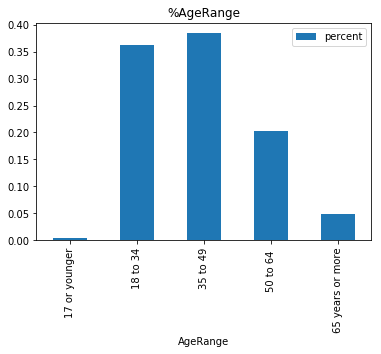

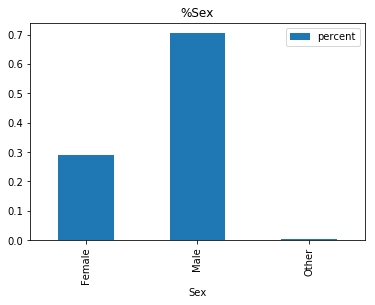

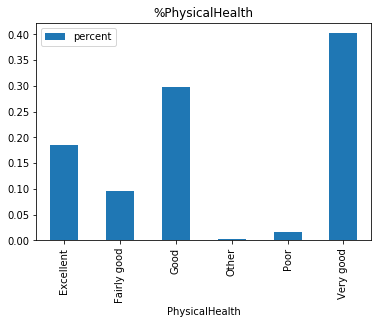

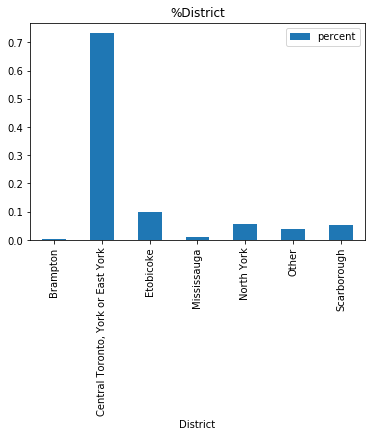

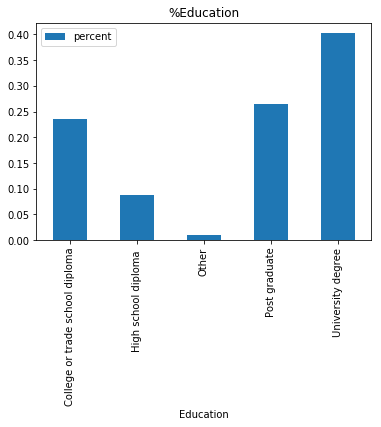

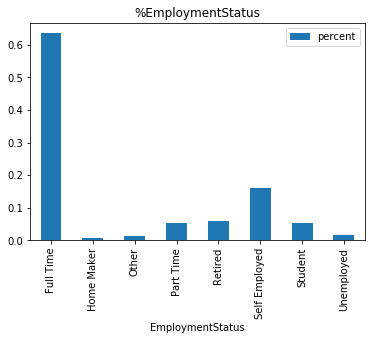

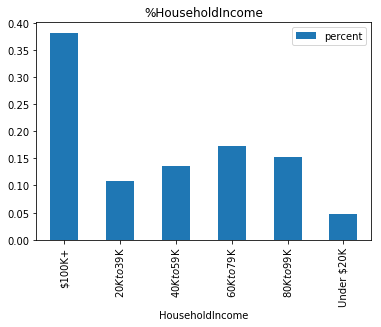

In [9]:
age_grouped.plot(kind='bar',x='AgeRange', y='percent').set_title('%AgeRange')
sex_grouped.plot(kind='bar',x='Sex', y='percent').set_title('%Sex')
health_grouped.plot(kind='bar',x='PhysicalHealth', y='percent').set_title('%PhysicalHealth')
district_grouped.plot(kind='bar',x='District', y='percent').set_title('%District')
education_grouped.plot(kind='bar',x='Education', y='percent').set_title('%Education')
employment_grouped.plot(kind='bar',x='EmploymentStatus', y='percent').set_title('%EmploymentStatus')
income_grouped.plot(kind='bar',x='HouseholdIncome', y='percent').set_title('%HouseholdIncome')


   require_e-bike_license    percent
1                       1  56.875585
0                       0  43.124415
   require_e-bike_insurance  percent
0                         0  50.5145
1                         1  49.4855
   allow_e-bikes_to_have_passenger    percent
0                                0  78.624883
1                                1  21.375117
   e-bike_heavier_than_bike   percent
1                         1  87.27783
0                         0  12.72217
   e-bike_accelerate_faster    percent
1                         1  59.214219
0                         0  40.785781
   e-bike_travels_further    percent
1                       1  51.169317
0                       0  48.830683
   e-bike_faster_than_average_cyclist    percent
1                                   1  68.521983
0                                   0  31.478017
  AwarePathSpeedLimit    percent
0                  No  50.795136
1                 Yes  49.204864
   more_signage   percent
0             1  44.24696


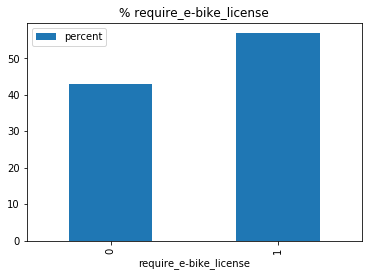

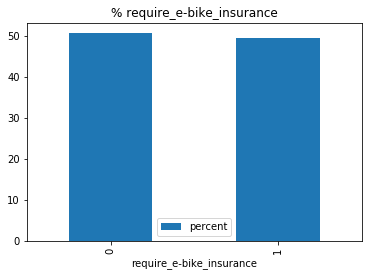

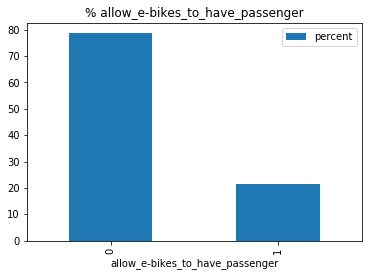

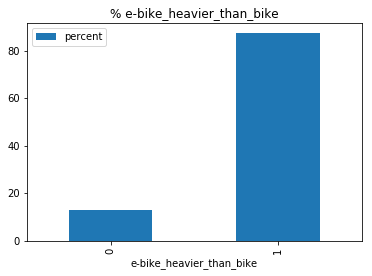

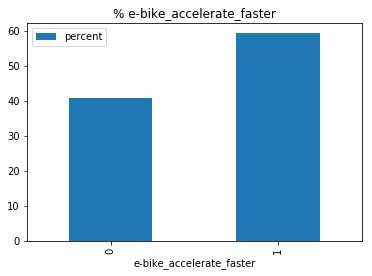

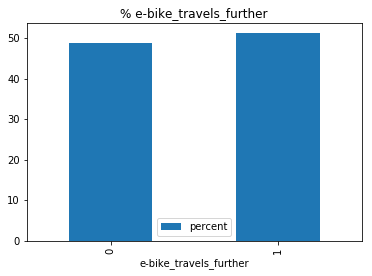

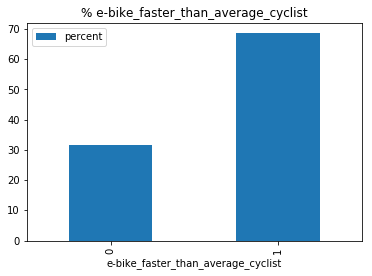

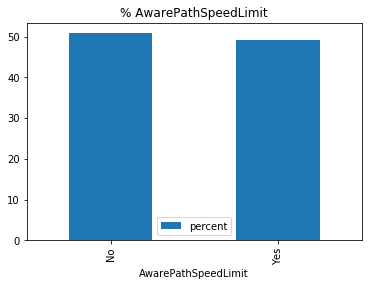

In [10]:
## Specific demographics

## e-bike users?
has_PAE_bike = (survey.groupby('has_PAE_bike')['has_PAE_bike'].count() / len(survey)).reset_index(name='percent')
#print(has_PAE_bike.sort_values(by='percent',ascending=False))
has_Gas_e_bike = (survey.groupby('has_Gas_e-bike')['has_Gas_e-bike'].count() / len(survey)).reset_index(name='percent')
#print(has_Gas_e_bike.sort_values(by='percent',ascending=False))


## PreferedTransportation?
PreferedTransportation = (survey.groupby('PreferedTransportation')['PreferedTransportation'].count() / len(survey)).reset_index(name='percent')
#print(PreferedTransportation.sort_values(by='percent',ascending=False))
## bicycle falls first


## PreferedTransportation among males
female_PreferedTransportation = (survey[survey['Sex'] == 'Female'].groupby('PreferedTransportation')['PreferedTransportation'].count() / len(survey[survey['Sex'] == 'Female'])).reset_index(name='percent')
#print(female_PreferedTransportation.sort_values(by='percent',ascending=False))


## HasCarSUVTruckOrVan : what's PreferedTransportation ?
has_car_PreferedTransportation = (survey[survey['has_car'] == 1].groupby('PreferedTransportation')['PreferedTransportation'].count() / len(survey[survey['has_car'] == 1])).reset_index(name='percent')
#print(has_car_PreferedTransportation.sort_values(by='percent',ascending=False))
## second comes bicycle

## HasCarSUVTruckOrVan : what's AvgDistanceTravel ?
has_car_PreferedTransportation = (survey[survey['has_car'] == 1].groupby('AvgDistanceTravel')['AvgDistanceTravel'].count() /  len(survey[survey['has_car'] == 1])).reset_index(name='percent')
#print(has_car_PreferedTransportation.sort_values(by='percent',ascending=False))
## more popularity for short distance of 5 - 10 km


########## Supporting Statements

## encourage e-bikes for Green transportation
bike_should_be_encouraged = (survey.groupby('e-bike_should_be_encouraged')['e-bike_should_be_encouraged'].count() / len(survey)).reset_index(name='percent')
#print(bike_should_be_encouraged.sort_values(by='percent',ascending=False))
## 53% agree

## require_e_bike_license
require_e_bike_license = ((survey.groupby('require_e-bike_license')['require_e-bike_license'].count() / len(survey))*100).reset_index(name='percent')
print(require_e_bike_license.sort_values(by='percent',ascending=False))
## 56% agree
require_e_bike_license.plot(kind='bar',x='require_e-bike_license', y='percent').set_title('% require_e-bike_license')

## require_e_bike_insurance
require_e_bike_insurance = ((survey.groupby('require_e-bike_insurance')['require_e-bike_insurance'].count() / len(survey))*100).reset_index(name='percent')
print(require_e_bike_insurance.sort_values(by='percent',ascending=False))
## 50% agree
require_e_bike_insurance.plot(kind='bar',x='require_e-bike_insurance', y='percent').set_title('% require_e-bike_insurance')

## allow_e_bikes_to_have_passenger
allow_e_bikes_to_have_passenger = ((survey.groupby('allow_e-bikes_to_have_passenger')['allow_e-bikes_to_have_passenger'].count() / len(survey))*100).reset_index(name='percent')
print(allow_e_bikes_to_have_passenger.sort_values(by='percent',ascending=False))
## 78% agree
allow_e_bikes_to_have_passenger.plot(kind='bar',x='allow_e-bikes_to_have_passenger', y='percent').set_title('% allow_e-bikes_to_have_passenger')


## e_bike_heavier_than_bike
e_bike_heavier_than_bike = ((survey.groupby('e-bike_heavier_than_bike')['e-bike_heavier_than_bike'].count() / len(survey))*100).reset_index(name='percent')
print(e_bike_heavier_than_bike.sort_values(by='percent',ascending=False))
## 87% agree
e_bike_heavier_than_bike.plot(kind='bar',x='e-bike_heavier_than_bike', y='percent').set_title('% e-bike_heavier_than_bike')

## e_bike_accelerate_faster
e_bike_accelerate_faster = ((survey.groupby('e-bike_accelerate_faster')['e-bike_accelerate_faster'].count() / len(survey))*100).reset_index(name='percent')
print(e_bike_accelerate_faster.sort_values(by='percent',ascending=False))
## 59% agree
e_bike_accelerate_faster.plot(kind='bar',x='e-bike_accelerate_faster', y='percent').set_title('% e-bike_accelerate_faster')

## e_bike_travels_further
e_bike_travels_further = ((survey.groupby('e-bike_travels_further')['e-bike_travels_further'].count() / len(survey))*100).reset_index(name='percent')
print(e_bike_travels_further.sort_values(by='percent',ascending=False))
## 51% agree
e_bike_travels_further.plot(kind='bar',x='e-bike_travels_further', y='percent').set_title('% e-bike_travels_further')

## e_bike_faster_than_average_cyclist
e_bike_faster_than_average_cyclist = ((survey.groupby('e-bike_faster_than_average_cyclist')['e-bike_faster_than_average_cyclist'].count() / len(survey))*100).reset_index(name='percent')
print(e_bike_faster_than_average_cyclist.sort_values(by='percent',ascending=False))
## 68% agree
e_bike_faster_than_average_cyclist.plot(kind='bar',x='e-bike_faster_than_average_cyclist', y='percent').set_title('% e-bike_faster_than_average_cyclist')

########## Usage of multi use trails

## trails_cycle
trails_cycle = ((survey.groupby('trails_cycle')['trails_cycle'].count() / len(survey))*100).reset_index(name='percent')
#print(trails_cycle.sort_values(by='percent',ascending=False))
## 62% use 

trails_walk = (survey.groupby('trails_walk')['trails_walk'].count() / len(survey)).reset_index(name='percent')
#print(trails_walk.sort_values(by='percent',ascending=False))
## 54% use 

trails_rarely_use = (survey.groupby('trails_rarely_use')['trails_rarely_use'].count() / len(survey)).reset_index(name='percent')
#print(trails_rarely_use.sort_values(by='percent',ascending=False))
## 87% use 

trails_pedal_e_bike = (survey.groupby('trails_pedal_e-bike')['trails_pedal_e-bike'].count() / len(survey)).reset_index(name='percent')
#print(trails_pedal_e_bike.sort_values(by='percent',ascending=False))
## 94% use 

trails_child_pet = (survey.groupby('trails_child_pet')['trails_child_pet'].count() / len(survey)).reset_index(name='percent')
#print(trails_child_pet.sort_values(by='percent',ascending=False))
## 90% use 

trails_run = (survey.groupby('trails_run')['trails_run'].count() / len(survey)).reset_index(name='percent')
#print(trails_run.sort_values(by='percent',ascending=False))
## 85% use 

trails_motor_e_bike = (survey.groupby('trails_motor_e-bike')['trails_motor_e-bike'].count() / len(survey)).reset_index(name='percent')
#print(trails_motor_e_bike.sort_values(by='percent',ascending=False))
## 97% use 


######### Are you aware that the City of Toronto's Multi-Use Paths have a speed limit of 20 km/h?

AwarePathSpeedLimit = ((survey.groupby('AwarePathSpeedLimit')['AwarePathSpeedLimit'].count() / len(survey))*100).reset_index(name='percent')
print(AwarePathSpeedLimit.sort_values(by='percent',ascending=False))
## 50% aware 
AwarePathSpeedLimit.plot(kind='bar',x='AwarePathSpeedLimit', y='percent').set_title('% AwarePathSpeedLimit')


######### Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?

more_signage = ((survey[survey['more_signage'] == 1].groupby('more_signage')['more_signage'].count() / len(survey))*100).reset_index(name='percent')
print(more_signage.sort_values(by='percent',ascending=False))
#more_signage.plot(kind='bar',x='more_signage', y='percent').set_title('% more_signage')

more_education = ((survey[survey['more_education'] == 1].groupby('more_education')['more_education'].count() / len(survey))*100).reset_index(name='percent')
print(more_education.sort_values(by='percent',ascending=False))
#more_education.plot(kind='bar',x='more_education', y='percent').set_title('% more_education')

more_enforcement = ((survey[survey['more_enforcement'] == 1].groupby('more_enforcement')['more_enforcement'].count() / len(survey))*100).reset_index(name='percent')
print(more_enforcement.sort_values(by='percent',ascending=False))
#more_enforcement.plot(kind='bar',x='more_enforcement', y='percent').set_title('% more_enforcement')


###### Sidewalk opinion

increase_signage = ((survey.groupby('increase_signage')['increase_signage'].count() / len(survey))*100).reset_index(name='percent')
print(increase_signage.sort_values(by='percent',ascending=False))
## 65%

maintain_existing_signage = ((survey.groupby('maintain_existing_signage')['maintain_existing_signage'].count() / len(survey))*100).reset_index(name='percent')
print(maintain_existing_signage.sort_values(by='percent',ascending=False))
## 62%

increase_enforcement = ((survey.groupby('increase_enforcement')['increase_enforcement'].count() / len(survey))*100).reset_index(name='percent')
print(increase_enforcement.sort_values(by='percent',ascending=False))
## 55%



In [11]:
## Correlation

## Corr of Sex and has_PAE_bike
survey_temp = survey[['Sex','has_PAE_bike']]
survey_temp = pd.get_dummies(survey_temp)
print(survey_temp.head())
print(survey_temp.corr())

## Corr of Education and has_PAE_bike
survey_temp = survey[['Education','has_PAE_bike']]
survey_temp = pd.get_dummies(survey_temp)
survey_temp.corr()

## Corr of EmploymentStatus and has_PAE_bike
survey_temp = survey[['HouseholdIncome','has_PAE_bike']]
survey_temp = pd.get_dummies(survey_temp)
print(survey_temp.corr())

## Corr of PhysicalHealth and has_PAE_bike
survey_temp = survey[['PhysicalHealth','has_PAE_bike']]
survey_temp = pd.get_dummies(survey_temp)
print(survey_temp.corr())



   has_PAE_bike  Sex_Female  Sex_Male  Sex_Other
0             0           0         1          0
1             0           0         1          0
2             0           0         1          0
3             0           0         1          0
4             0           0         1          0
              has_PAE_bike  Sex_Female  Sex_Male  Sex_Other
has_PAE_bike      1.000000   -0.060535  0.062601  -0.016339
Sex_Female       -0.060535    1.000000 -0.989882  -0.041599
Sex_Male          0.062601   -0.989882  1.000000  -0.100592
Sex_Other        -0.016339   -0.041599 -0.100592   1.000000
                              has_PAE_bike  HouseholdIncome_$100K+  \
has_PAE_bike                      1.000000               -0.026596   
HouseholdIncome_$100K+           -0.026596                1.000000   
HouseholdIncome_$20K to $39K      0.058651               -0.274374   
HouseholdIncome_$40K to $59K     -0.007751               -0.312777   
HouseholdIncome_$60K to $79K     -0.004506              

In [12]:
### Other thoughts

income_age_grouped = (survey.groupby(['HouseholdIncome','AgeRange'])['AgeRange'].count() / len(survey)).reset_index(name='percent')
print(income_age_grouped.sort_values(by=['HouseholdIncome','percent'],ascending=False))
## Under Loweest income group: Lower age group
## Under Highest income group: Higher age group


age_sex_grouped = (survey.groupby(['AgeRange','Sex'])['AgeRange'].count() / len(survey)).reset_index(name='percent')
#print(age_sex_grouped)

employment_sex_grouped = (survey.groupby(['EmploymentStatus','Sex'])['EmploymentStatus'].count() / len(survey)).reset_index(name='percent')
#print(employment_sex_grouped)

employment_female_grouped = (survey[survey['Sex'] == 'Female'].groupby(['EmploymentStatus','Sex'])['EmploymentStatus'].count()).reset_index(name='count')
#print(employment_female_grouped)


PreferedTransportation_grouped = (survey.groupby('PreferedTransportation')['PreferedTransportation'].count() / len(survey)).reset_index(name='percent')
#print(PreferedTransportation_grouped.sort_values(by='percent',ascending=False))
#PreferedTransportation_grouped.plot(kind='bar',x='PreferedTransportation', y='percent').set_title('%PreferedTransportation')


#print(survey[['has_bicycle','PreferedTransportation','AgeRange']].groupby(['PreferedTransportation','AgeRange']).mean())

#print(survey[['trails_pedal_e-bike','trails_motor_e-bike','use_pedal_e-bike','use_motor_e-bike']].mean())

#print(survey[['has_PAE_bike','AgeRange']].groupby(['AgeRange']).mean())
#print(survey[['has_Gas_e-bike','AgeRange']].groupby(['AgeRange']).mean())
#print(survey[['has_bicycle','AgeRange']].groupby(['AgeRange']).mean())

#print(survey[survey['has_bicycle'] == 1].count())
#survey.loc[(survey['has_bicycle'] == 1) & (survey['Sex'] == 'Male')].count()

#BikePref = survey[survey['PreferedTransportation'] == 'bicycle']
#BikePref.groupby('AgeRange')['AvgDistanceTravel'].value_counts()


   HouseholdIncome          AgeRange   percent
24      Under $20K          18 to 34  0.031805
25      Under $20K          35 to 49  0.006548
26      Under $20K         50 to 64   0.006080
27      Under $20K  65 years or more  0.002339
23      Under $20K     17 or younger  0.000468
20    $80K to $99K          35 to 49  0.060337
19    $80K to $99K          18 to 34  0.048644
21    $80K to $99K         50 to 64   0.035080
22    $80K to $99K  65 years or more  0.007951
18    $80K to $99K     17 or younger  0.001403
14    $60K to $79K          18 to 34  0.070159
15    $60K to $79K          35 to 49  0.062675
16    $60K to $79K         50 to 64   0.029467
17    $60K to $79K  65 years or more  0.009355
13    $60K to $79K     17 or younger  0.000468
9     $40K to $59K          18 to 34  0.062675
10    $40K to $59K          35 to 49  0.044902
11    $40K to $59K         50 to 64   0.021983
12    $40K to $59K  65 years or more  0.007016
5     $20K to $39K          18 to 34  0.060337
6     $20K to

In [13]:
#view of all features coorelations

survey_temp = survey[[ 'Sex', 'PhysicalHealth', 'Education', 'EmploymentStatus' , 'District', 'PreferedTransportation','AvgDistanceTravel','AvgCommute','AwarePathSpeedLimit','has_car',
 'has_motorcycle',
 'has_bicycle',
 'has_PAE_bike',
 'has_scooter',
 'has_Gas_e-bike',
 'has_Auto_Share',
 'trails_cycle',
 'trails_walk',
 'trails_rarely_use',
 'trails_pedal_e-bike',
 'trails_child_pet',
 'trails_run',
 'trails_motor_e-bike',
 'e-bike_pedals_unnecessary',
 'e-bike_wider_than_bike',
 'e-bike_heavier_than_bike',
 'e-bike_accelerate_faster',
 'e-bike_should_be_encouraged',
 'allow_e-bikes_to_have_passenger',
 'e-bike_travels_further',
 'e-bike_faster_than_average_cyclist',
 'require_e-bike_license',
 'require_e-bike_insurance',
 'e-bike_different_than_pedal_assisted_bicycle',
 'Not_agree_above',
 'e-bike_wider_than_cyclist_on_bike',
 'e-bike_heavier_than_cyclist_on_bike',
 'allow_e-bikes_faster_than_32km/h',
 'allow_e-bikes_on_trail',
 'no_bylaw_changes',
 'allow_special_e-bikes_on_trail',
 'allow_pedal_e-bikes_on_trail',
 'allow_recreational_motor_vehicles_on_trail',
 'e-bike_speed_limit_32km/h',
 'maintain_existing_signage',
 'education_enforcement',
 'increase_signage',
 'increase_education',
 'increase_enforcement',
 'update_personal_mobility_device_definition',
 'set_sidewalk_speed_limit',
 'do_nothing',
 'no_answer',
 'allow_e-bikes_on_bike_lanes',
 'allow_e-bikes_on_suburb_bike_lanes_only',
 'no_changes_to_bylaw',
 'allow_special_e-bikes_on_bike_lanes',
 'allow_pedal-assist_e-bikes_battery_boost',
 'allow_e-bikes_on_bike_lanes_with_restrictions',
 'use_cruiser_bike',
 'use_road_bike',
 'use_mountain_bike', 
 'do_not_use_bike_lanes',
 'use_pedal_e-bike',
 'use_motor_e-bike',
 'use_recombent',
 'trails_are_fine',
 'more_signage',
 'more_enforcement',
 'more_education',
 'no_aware_conflicts',
 'conflict_cyclist_pedestrian',
 'conflict_e-bike_pedestrian',
 'conflict_e-bike_cyclist',
 'conflict_dog',
 'conflict_pedestrian_runner',
 'conflict_skater',
 'conflict_cyclists',
 'conflict_e-bikes',
 'allow_special_e-bikes_on_trail'
]]
survey_temp = pd.get_dummies(survey_temp)
corr_info = survey_temp.corr()
#corr_info.to_csv(r'File Name.csv')
survey_temp.corr()

,has_car,has_motorcycle,has_bicycle,has_PAE_bike,has_scooter,has_Gas_e-bike,has_Auto_Share,trails_cycle,trails_walk,trails_rarely_use,...,AvgDistanceTravel_Over 35 km,AvgDistanceTravel_Under 2 km,AvgCommute_15 minutes or less,AvgCommute_16 - 29 minutes,AvgCommute_30 - 44 minutes,AvgCommute_45 minutes - 1 hour,AvgCommute_I do not commute,AvgCommute_over 1 hour each way,AwarePathSpeedLimit_No,AwarePathSpeedLimit_Yes
has_car,1.000000,-0.219647,-0.018326,-0.170461,-0.142910,-0.055956,-0.015486,0.040727,0.025124,-0.021907,...,0.029569,-0.024143,-0.031125,-0.011707,0.026490,-0.010340,0.039148,-0.006512,0.044708,-0.044708
has_motorcycle,-0.219647,1.000000,-0.020524,-0.058818,-0.058749,0.246284,-0.046863,-0.068451,0.051183,0.099649,...,0.171884,-0.045378,0.013530,-0.036079,0.019475,0.013031,-0.034102,0.041303,0.093051,-0.093051
has_bicycle,-0.018326,-0.020524,1.000000,0.020235,0.022841,0.055179,0.056135,-0.006157,0.013334,0.027633,...,0.002103,-0.017430,0.018247,-0.008031,-0.033276,0.006427,0.014961,0.026589,-0.025478,0.025478
has_PAE_bike,-0.170461,-0.058818,0.020235,1.000000,0.010818,-0.003002,-0.032887,-0.160019,-0.078896,-0.005841,...,0.031880,0.001765,-0.017011,-0.044680,-0.013750,0.001774,0.102231,0.030076,-0.081178,0.081178
has_scooter,-0.142910,-0.058749,0.022841,0.010818,1.000000,0.000433,-0.031059,-0.159308,0.008634,0.073172,...,-0.030138,-0.042262,-0.016944,-0.013960,-0.013136,0.031404,0.027946,0.007710,-0.053745,0.053745
has_Gas_e-bike,-0.055956,0.246284,0.055179,-0.003002,0.000433,1.000000,-0.017367,-0.052327,0.008239,0.036172,...,0.001828,-0.027474,0.017520,0.007141,0.013812,-0.046187,-0.010275,0.005214,0.058870,-0.058870
has_Auto_Share,-0.015486,-0.046863,0.056135,-0.032887,-0.031059,-0.017367,1.000000,0.026671,-0.024821,-0.016765,...,-0.050699,0.012436,-0.029351,0.040354,0.007738,-0.022128,-0.009384,-0.011301,-0.023896,0.023896
trails_cycle,0.040727,-0.068451,-0.006157,-0.160019,-0.159308,-0.052327,0.026671,1.000000,-0.165284,-0.377579,...,-0.065774,-0.013351,0.001081,0.066464,-0.000124,-0.028061,-0.074078,-0.018930,-0.166254,0.166254
trails_walk,0.025124,0.051183,0.013334,-0.078896,0.008634,0.008239,-0.024821,-0.165284,1.000000,-0.168629,...,-0.019804,0.011952,-0.026786,-0.010804,0.009625,0.014413,0.016341,0.010574,0.139494,-0.139494
trails_rarely_use,-0.021907,0.099649,0.027633,-0.005841,0.073172,0.036172,-0.016765,-0.377579,-0.168629,1.000000,...,0.062370,0.011282,0.038128,-0.014366,0.010341,0.004252,-0.043030,-0.008971,0.192847,-0.192847


In [14]:
#View specific correlations. Note, remove comment '#' on survey_temp.corr() to view correlation

#Correlation between AvgDistanceTravel and PreferedTransportation
survey_temp1 = survey[['AvgDistanceTravel','PreferedTransportation']]
survey_temp1 = pd.get_dummies(survey_temp1)


#Correlation between trails_pedal_e-bike and has_PAE_bike - 0.580493
survey_temp2 = survey[['trails_pedal_e-bike','has_PAE_bike']]
survey_temp2 = pd.get_dummies(survey_temp2)

    #Correlation between trails_pedal_e-bike and use_pedal_e-bike - 0.728173615467528
survey_temp3 = survey[['trails_pedal_e-bike','use_pedal_e-bike']]
survey_temp3 = pd.get_dummies(survey_temp3)


#Correlation between trails_pedal_e-bike and PreferedTransportation_pedal assist type e-bike - 0.556729063813068
survey_temp4 = survey[['trails_pedal_e-bike','PreferedTransportation']]
survey_temp4 = pd.get_dummies(survey_temp4)


#Correlation between require_e-bike_insurance and require_e-bike_license -  0.731508284636201
survey_temp5 = survey[['require_e-bike_insurance','require_e-bike_license']]
survey_temp5 = pd.get_dummies(survey_temp5)


#Correlation between e-bike_speed_limit_32km/h and e-bike_wider_than_cyclist_on_bike - 1
survey_temp6 = survey[['e-bike_speed_limit_32km/h','e-bike_wider_than_cyclist_on_bike']]
survey_temp6 = pd.get_dummies(survey_temp6)


#Correlation between e-bike_speed_limit_32km/h and e-bike_heavier_than_cyclist_on_bike - 1
survey_temp7 = survey[['e-bike_speed_limit_32km/h','e-bike_heavier_than_cyclist_on_bike']]
survey_temp7 = pd.get_dummies(survey_temp7)


#Correlation between maintain_existing_signage and education_enforcement - 1
survey_temp8 = survey[['maintain_existing_signage','education_enforcement']]
survey_temp8 = pd.get_dummies(survey_temp8)

#Correlation between allow_e-bikes_on_bike_lanes and allow_e-bikes_on_trail - 0.605358261880115
survey_temp9 = survey[['allow_e-bikes_on_bike_lanes','allow_e-bikes_on_trail']]
survey_temp9 = pd.get_dummies(survey_temp9)


#Correlation between allow_pedal-assist_e-bikes_battery_boost and allow_pedal_e-bikes_on_trail - 0.612112544934353
survey_temp10 = survey[['allow_pedal-assist_e-bikes_battery_boost','allow_pedal_e-bikes_on_trail']]
survey_temp10 = pd.get_dummies(survey_temp10)

#Correlation between allow_special_e-bikes_on_trail and allow_special_e-bikes_on_trail - 1
survey_temp11 = survey[['allow_special_e-bikes_on_trail','allow_special_e-bikes_on_trail']]
survey_temp11 = pd.get_dummies(survey_temp11)


#survey_temp1.corr()
#survey_temp2.corr()
#survey_temp3.corr()
#survey_temp4.corr()
#survey_temp5.corr()
#survey_temp6.corr()
survey_temp7.corr()
#survey_temp8.corr()
#survey_temp9.corr()
#survey_temp10.corr()
#survey_temp11.corr()


,e-bike_speed_limit_32km/h,e-bike_heavier_than_cyclist_on_bike
e-bike_speed_limit_32km/h,1.0,1.0
e-bike_heavier_than_cyclist_on_bike,1.0,1.0
